In [1]:
from coorx import STTransform
###################
# This gets run by the conftest.py NotebookFile plugin and asserts that all output cells
# are identical (within tolerance) to the last run. Failed runs will save the output to a
# separate file for review. If using `act -j test`, you will need to also pass `--bind`
# to get that file.
###################
from coorx.image import Image
import numpy as np
import matplotlib.pyplot as plt

[[20 20]
 [80 20]
 [20 80]
 [80 80]] [[ 57.51923789  27.51923789]
 [109.48076211  57.51923789]
 [ 27.51923789  79.48076211]
 [ 79.48076211 109.48076211]] [[ 27.51923789  27.51923789]
 [ 79.48076211  57.51923789]
 [ -2.48076211  79.48076211]
 [ 49.48076211 109.48076211]] [[13.75961894 13.75961894]
 [39.74038106 28.75961894]
 [-1.24038106 39.74038106]
 [24.74038106 54.74038106]]
{'type': 'AffineTransform', 'dynamic': False, 'dims': [2, 2], 'matrix': [[0.8660254037844387, -0.49999999999999994], [0.49999999999999994, 0.8660254037844387]], 'offset': [50.19872981077806, 0.19872981077806173], 'systems': ['image_0', 'image_1', 'image_graph']} {'type': 'TTransform', 'dynamic': False, 'dims': [2, 2], 'offset': [-30.0, 0.0], 'systems': ['image_1', 'image_2', 'image_graph']} {'type': 'STTransform', 'dynamic': False, 'dims': [2, 2], 'scale': [0.5, 0.5], 'offset': [0.0, 0.0], 'systems': ['image_2', 'image_3', 'image_graph']}


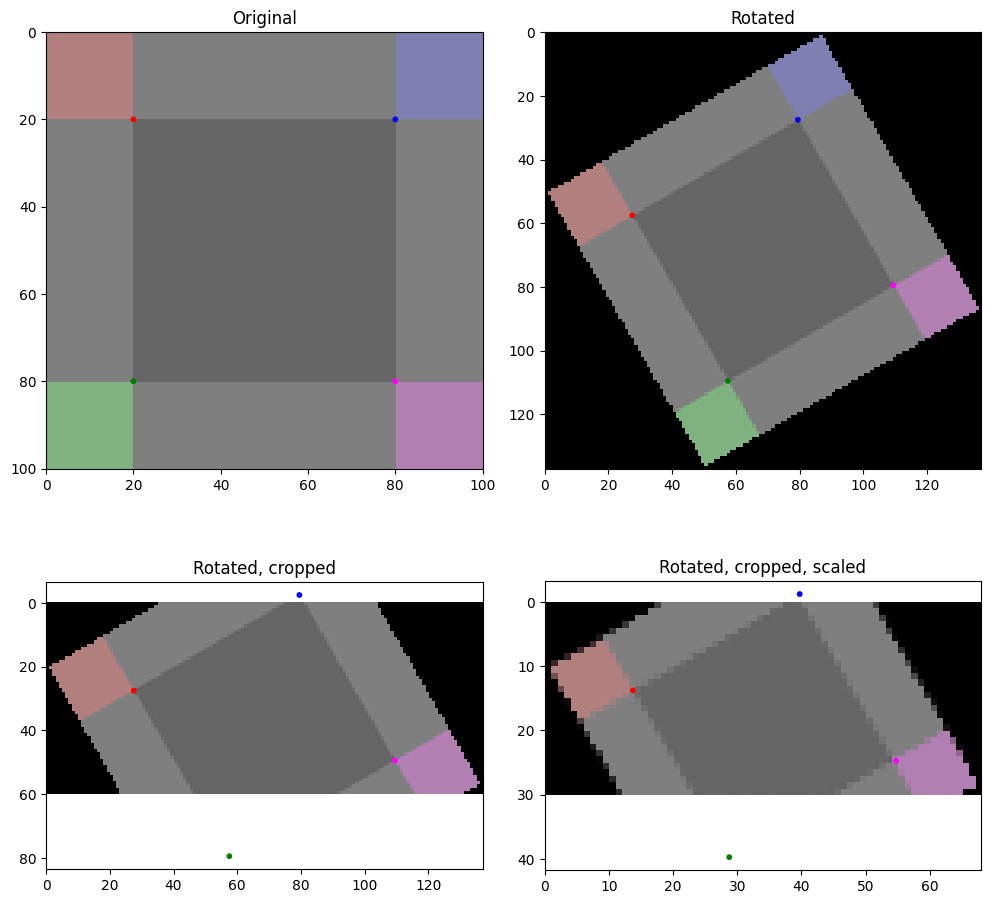

In [2]:
img_data = np.ones((100, 100, 3)) * 0.5
img_data[20:80, 20:80] -= 0.1
img_data[:20, :20, 0] += .2
img_data[80:, :20, 1] += .2
img_data[:20, 80:, 2] += .2
img_data[80:, 80:, [0,2]] += .2

img1 = Image(img_data, axes=(0, 1))
pts1 = img1.point_array([[20, 20], [80, 20], [20, 80], [80, 80]])

img2 = img1.rotate(30, axes=(0, 1), order=2, prefilter=True)
pts2 = pts1.mapped_to(img2.system)

img3 = img2[30:90, :]
pts3 = pts1.mapped_to(img3.system)

img4 = img3.zoom(0.5, prefilter=True, order=1)
pts4 = pts1.mapped_to(img4.system)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(img1.image, cmap='gray', extent=(0, img1.spatial_shape[1], img1.spatial_shape[0], 0))
ax[0, 0].scatter(pts1[:, 1], pts1[:, 0], color=('red', 'green', 'blue', 'magenta'), s=10)
ax[0, 0].set_title('Original')

ax[0, 1].imshow(img2.image, cmap='gray', extent=(0, img2.spatial_shape[1], img2.spatial_shape[0], 0))
ax[0, 1].scatter(pts2[:, 1], pts2[:, 0], color=('red', 'green', 'blue', 'magenta'), s=10)
ax[0, 1].set_title('Rotated')

ax[1, 0].imshow(img3.image, cmap='gray', extent=(0, img3.spatial_shape[1], img3.spatial_shape[0], 0))
ax[1, 0].scatter(pts3[:, 1], pts3[:, 0], color=('red', 'green', 'blue', 'magenta'), s=10)
ax[1, 0].set_title('Rotated, cropped')

ax[1, 1].imshow(img4.image, cmap='gray', extent=(0, img4.spatial_shape[1], img4.spatial_shape[0], 0))
ax[1, 1].scatter(pts4[:, 1], pts4[:, 0], color=('red', 'green', 'blue', 'magenta'), s=10)
ax[1, 1].set_title('Rotated, cropped, scaled')

fig.tight_layout()

# So that tests can tell if these values have changed
print(pts1.coordinates, pts2.coordinates, pts3.coordinates, pts4.coordinates)
print(img2._parent_tr.save_state(), img3._parent_tr.save_state(), img4._parent_tr.save_state())

[[ 0 20 20]
 [ 0 80 20]
 [ 0 20 80]
 [ 0 80 80]] [[  0.          57.51923789  27.51923789]
 [  0.         109.48076211  57.51923789]
 [  0.          27.51923789  79.48076211]
 [  0.          79.48076211 109.48076211]] [[  0.          27.51923789  27.51923789]
 [  0.          79.48076211  57.51923789]
 [  0.          -2.48076211  79.48076211]
 [  0.          49.48076211 109.48076211]] [[ 0.         13.75961894 13.75961894]
 [ 0.         39.74038106 28.75961894]
 [ 0.         -1.24038106 39.74038106]
 [ 0.         24.74038106 54.74038106]]
[[1.00e-03 6.40e-06 1.20e-04]
 [1.00e-03 2.56e-05 1.20e-04]
 [1.00e-03 6.40e-06 1.80e-04]
 [1.00e-03 2.56e-05 1.80e-04]] [[1.00e-03 6.40e-06 1.20e-04]
 [1.00e-03 2.56e-05 1.20e-04]
 [1.00e-03 6.40e-06 1.80e-04]
 [1.00e-03 2.56e-05 1.80e-04]] [[1.00e-03 6.40e-06 1.20e-04]
 [1.00e-03 2.56e-05 1.20e-04]
 [1.00e-03 6.40e-06 1.80e-04]
 [1.00e-03 2.56e-05 1.80e-04]] [[1.00e-03 6.40e-06 1.20e-04]
 [1.00e-03 2.56e-05 1.20e-04]
 [1.00e-03 6.40e-06 1.80e-04]
 [1

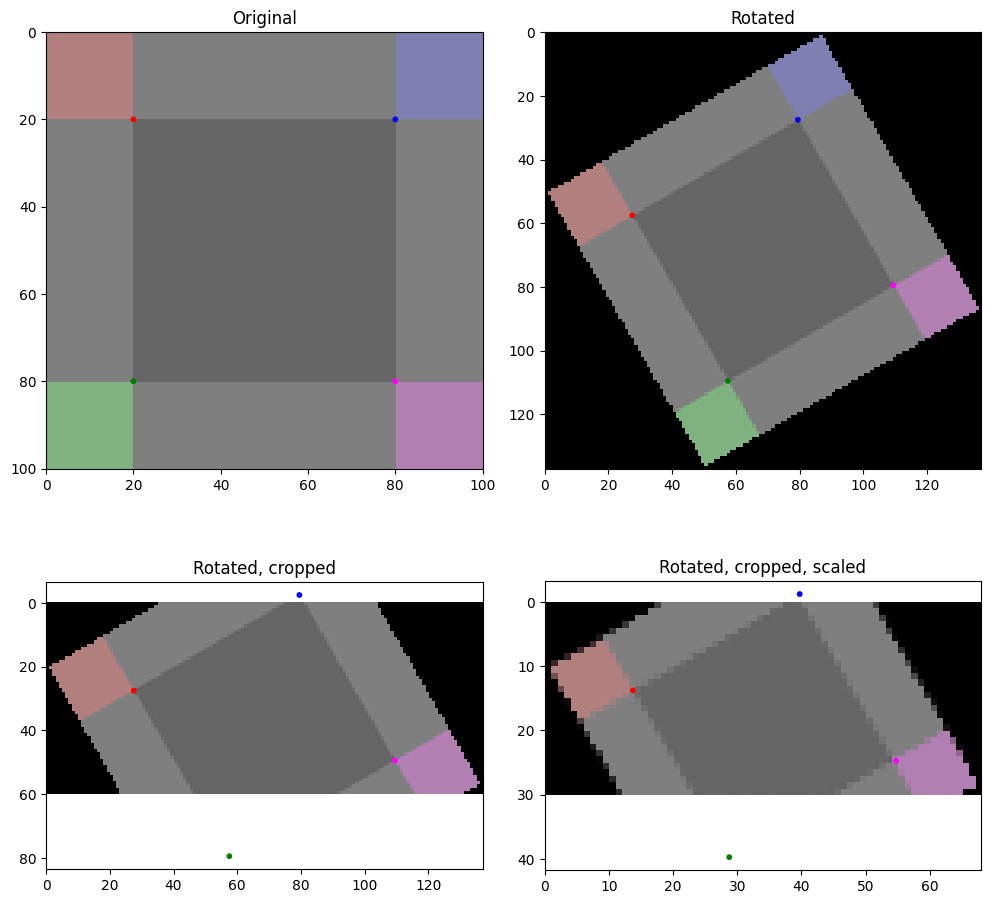

In [3]:
# 3D version, with messy axes
img_data_3d = np.ones((10, 3, 100, 100)) * 0.5
img_data_3d[:, :, 20:80, 20:80] -= 0.1
img_data_3d[:, 0, :20, :20] += .2
img_data_3d[:, 1, 80:, :20] += .2
img_data_3d[:, 2, :20, 80:] += .2
img_data_3d[:, [0, 2], 80:, 80:] += .2
to_global = STTransform(scale=(3.2e-7, 3.2e-7, 1e-6), offset=(1e-3, 0, 100e-6), from_cs="3d image 1", to_cs="global")
img1_3d = Image(img_data_3d, axes=(0, 2, 3), system=to_global.systems[0])
pts1_3d = img1_3d.point_array([[0, 20, 20], [0, 80, 20], [0, 20, 80], [0, 80, 80]])
img2_3d = img1_3d.rotate(30, axes=(1, 2), order=2, prefilter=True)
pts2_3d = pts1_3d.mapped_to(img2_3d.system)
img3_3d = img2_3d[:, :, 30:90, :]
pts3_3d = pts1_3d.mapped_to(img3_3d.system)
img4_3d = img3_3d.zoom(0.5, prefilter=True, order=1)
pts4_3d = pts1_3d.mapped_to(img4_3d.system)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(img1_3d.image[0].transpose(1, 2, 0), cmap='gray', extent=(0, img1_3d.spatial_shape[2], img1_3d.spatial_shape[1], 0))
ax[0, 0].scatter(pts1_3d[:, 2], pts1_3d[:, 1], color=('red', 'green', 'blue', 'magenta'), s=10)
ax[0, 0].set_title('Original')
ax[0, 1].imshow(img2_3d.image[0].transpose(1, 2, 0), cmap='gray', extent=(0, img2_3d.spatial_shape[2], img2_3d.spatial_shape[1], 0))
ax[0, 1].scatter(pts2_3d[:, 2], pts2_3d[:, 1], color=('red', 'green', 'blue', 'magenta'), s=10)
ax[0, 1].set_title('Rotated')
ax[1, 0].imshow(img3_3d.image[0].transpose(1, 2, 0), cmap='gray', extent=(0, img3_3d.spatial_shape[2], img3_3d.spatial_shape[1], 0))
ax[1, 0].scatter(pts3_3d[:, 2], pts3_3d[:, 1], color=('red', 'green', 'blue', 'magenta'), s=10)
ax[1, 0].set_title('Rotated, cropped')
ax[1, 1].imshow(img4_3d.image[0].transpose(1, 2, 0), cmap='gray', extent=(0, img4_3d.spatial_shape[2], img4_3d.spatial_shape[1], 0))
ax[1, 1].scatter(pts4_3d[:, 2], pts4_3d[:, 1], color=('red', 'green', 'blue', 'magenta'), s=10)
ax[1, 1].set_title('Rotated, cropped, scaled')
fig.tight_layout()
# So that tests can tell if these values have changed
print(pts1_3d.coordinates, pts2_3d.coordinates, pts3_3d.coordinates, pts4_3d.coordinates)
print(pts1_3d.mapped_to("global").coordinates, pts2_3d.mapped_to("global").coordinates, pts3_3d.mapped_to("global").coordinates, pts4_3d.mapped_to("global").coordinates)
print(img2_3d._parent_tr.save_state(), img3_3d._parent_tr.save_state(), img4_3d._parent_tr.save_state())